# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

tickers = ["BTC", "ETH"]
crypto = pd.DataFrame([my_btc, my_eth], index=tickers)

crypto

,0
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
btc_price

72670.3754

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
eth_price

2238.333076

In [7]:
# Compute current value of my crpto
btc_value = my_btc * btc_price
eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $87204.45
The current value of your 5.3 ETH is $11863.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [10]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-17", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
stock_df

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-03-17 00:00:00-04:00  113.55  113.9778  113.48  113.87  5023810  394.53   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-17 00:00:00-04:00  398.12  393.3  397.22  61876016

In [11]:
# Pick AGG and SPY close prices
agg_close = float(stock_df["AGG"]["close"])
spy_close = float(stock_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $113.87
Current SPY closing price: $397.22


In [12]:
# Compute the current value of shares
agg_value = agg_close * my_agg
spy_value = spy_close * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $19861.00
The current value of your 200 AGG shares is $22774.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
stocks = agg_value + spy_value
crypto = (btc_value + eth_value)
df_savings = pd.DataFrame([crypto, stocks])
columns = ["amount"]
df_savings.columns = columns
df_savings.index = ['crypto', 'shares'] 
# Display savings DataFrame
display(df_savings)

,amount
crypto,99067.615783
shares,42635.000000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

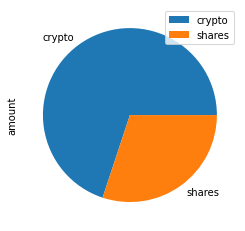

In [14]:
# Plot savings pie chart
df_savings.plot.pie(subplots=True)

In [53]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + stocks

# Validate saving health
if total_savings >= emergency_fund:
    print(f"Congratulations! You you have enough money in your emergency fund.")
else:
    print(f"Better keep saving!") 

Congratulations! You you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-03-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-03-19', tz='America/New_York').isoformat()

### Note that the Alpaca API offers a maximum of 1000 days of data without 

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# Set the stock tickers
tickers = ["SPY", "AGG"]
df_1000 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

# Get 1 year's worth of historical data for all stocks
df_365 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=365
).df

# Display sample data
df_365.sort_index().tail()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2021-03-12 00:00:00-05:00  113.88  113.9100  113.705  113.79  4339393   
2021-03-15 00:00:00-04:00  113.60  114.0100  113.600  113.94  4210749   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.780  113.87  3977851   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.480  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.200  113.42  6077516   

                               SPY                                     
                              open     high     low   close    volume  
time                                                                   
2021-03-12 00:00:00-05:00  392.070  394.210  391.20  394.09  56997361  
2021-03-15 00:00:00-04:00  394.330  396.685  392.03  396.47  64471980  
2021-03-16 00:00:00-04:00  397.070  397.830  395.08  395.94  65719794  
2021-03-17 00:00:00-04:00  394.530  398.120  393.30  397.22  61876016  
2021-03-18 00:00:00-04:00  394.475  396.720  390.75  391.41  98794050

In [20]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_MC = MCSimulation(
    portfolio_data = df_365,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [21]:
# Printing the simulation input data
retirement_MC.portfolio_data.tail()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2021-03-12 00:00:00-05:00  113.88  113.9100  113.705  113.79  4339393   
2021-03-15 00:00:00-04:00  113.60  114.0100  113.600  113.94  4210749   
2021-03-16 00:00:00-04:00  113.97  114.0320  113.780  113.87  3977851   
2021-03-17 00:00:00-04:00  113.55  113.9778  113.480  113.87  5023810   
2021-03-18 00:00:00-04:00  113.32  113.8600  113.200  113.42  6077516   

                                            SPY                           \
                          daily_return     open     high     low   close   
time                                                                       
2021-03-12 00:00:00-05:00    -0.005680  392.070  394.210  391.20  394.09   
2021-03-15 00:00:00-04:00     0.001318  394.330  396.685  392.03  396.47   
2021-03-16 00:00:00-04:00    -0.000614  397.070  397.830  395.08  395.94   
2021-03-17 00:00:00-04:00     0.000000  394.530  398.120  393.30  397.22   
2021-03-18 00:00:00-04:00    -0.003952  394.475  396.720  390.75  391.41   

                                                  
                             volume daily_return  
time                                              
2021-03-12 00:00:00-05:00  56997361     0.001499  
2021-03-15 00:00:00-04:00  64471980     0.006039  
2021-03-16 00:00:00-04:00  65719794    -0.001337  
2021-03-17 00:00:00-04:00  61876016     0.003233  
2021-03-18 00:00:00-04:00  98794050    -0.014627

In [22]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990102,1.005517,1.004930,1.007389,1.001343,1.004597,1.010462,0.984644,0.992231,1.009344,...,1.003457,0.997679,0.995714,0.993823,0.987406,0.991022,0.992012,1.006280,1.002588,0.991317
2,0.988132,1.012946,1.009941,1.010165,1.011251,0.998754,1.025319,0.990787,1.008148,1.002718,...,1.004256,0.986504,0.990046,0.989386,0.996901,0.991940,0.987449,1.011595,0.999907,0.989522
3,0.999560,1.011189,1.004761,1.018121,1.012145,1.000270,1.029129,0.996192,1.014742,1.013068,...,0.990354,0.998192,0.985434,0.974757,1.008408,0.987030,0.980259,1.010685,0.997604,0.989223
4,1.002215,1.010263,1.002081,1.025685,1.017808,0.987209,1.031041,1.010908,1.021824,1.013480,...,0.997290,1.002223,0.978339,0.981614,0.999185,0.982081,0.979077,1.011095,0.996484,0.993854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.460181,28.742104,18.209540,36.368424,6.236322,11.868460,10.526501,15.413368,17.304783,29.167979,...,6.980318,17.500407,6.029692,31.045383,24.971719,9.622822,28.750111,13.353714,19.593457,10.098921
7557,14.484461,29.092410,18.220034,36.438176,6.188452,11.878240,10.560824,15.619355,17.324471,28.977456,...,6.996929,17.654226,6.109921,31.131427,25.041771,9.733938,29.075521,13.285015,19.525358,10.110811
7558,14.689434,29.463815,18.224945,36.523060,6.246835,11.796157,10.537005,15.559010,17.326305,28.419517,...,6.980686,17.594485,6.125932,31.096857,25.049047,9.737889,29.181395,13.179013,19.795010,10.134136
7559,14.630315,29.319467,18.188996,37.184906,6.314568,11.878747,10.560267,15.690032,17.557990,28.670330,...,6.998292,17.477350,6.101408,31.025230,24.767287,9.723667,29.323756,13.401055,19.764624,10.197394


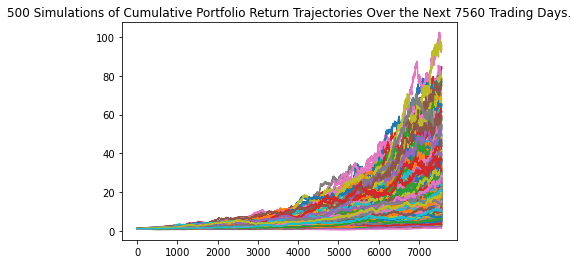

In [24]:
# Plot simulation outcomes
plot = retirement_MC.plot_simulation()

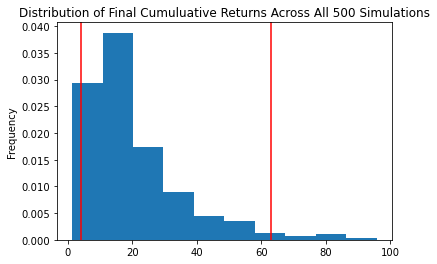

In [25]:
# Plot probability distribution and confidence intervals
dist_plot = retirement_MC.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
stats = retirement_MC.summarize_cumulative_return()


# Print summary statistics
print(stats)

count           500.000000
mean             20.281328
std              15.286995
min               1.373497
25%              10.119615
50%              15.756720
75%              24.229951
max              95.795196
95% CI Lower      4.031054
95% CI Upper     63.118102
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $80621.07 and $1262362.04


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(stats[8]*initial_investment,2)
ci_upper = round(stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $120931.61 and $1893543.07


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
shrt_retirement_MC = MCSimulation(
    portfolio_data = df_365,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [34]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
shrt_retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001545,1.005052,1.002882,0.989652,0.998085,0.996468,0.992389,0.999144,1.000290,1.001491,...,1.008119,1.000616,0.995723,1.004570,1.007735,0.995384,1.003074,0.994143,0.986990,0.988024
2,0.999307,1.005609,1.000759,0.979201,0.993239,0.989885,0.977595,1.008851,1.001089,0.997303,...,1.009962,1.001752,1.004461,0.989503,1.005112,1.004580,0.992940,0.992520,0.987847,0.982967
3,0.995158,1.000569,1.005890,0.987146,0.986747,0.979852,0.983327,1.001382,1.015585,0.991599,...,1.017260,1.007251,1.003592,0.986530,1.015414,1.010087,1.003256,0.996187,0.972899,0.977952
4,0.996356,1.007115,0.998453,0.972334,0.986825,0.988341,0.973088,1.005945,1.006505,0.994140,...,1.004571,1.013030,1.013818,0.991588,1.018528,1.007864,1.004499,0.999553,0.970581,0.963562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.466335,1.745885,2.543762,1.044762,1.232470,2.162266,1.767534,1.039361,1.463645,1.401925,...,2.012612,1.626459,1.554181,1.064597,2.001447,1.451161,0.652606,2.476629,2.081533,2.808364
1257,2.411063,1.754218,2.543730,1.055356,1.238760,2.127053,1.778855,1.043726,1.474018,1.408492,...,1.997257,1.639439,1.567757,1.070592,2.004453,1.476822,0.649091,2.488930,2.056631,2.814619
1258,2.420316,1.737740,2.532809,1.043060,1.227610,2.147032,1.798903,1.050521,1.483766,1.416395,...,1.997426,1.646006,1.585575,1.060987,2.039847,1.485838,0.646572,2.508130,2.051149,2.819372
1259,2.401460,1.752105,2.540360,1.049191,1.237083,2.149992,1.822242,1.056030,1.473302,1.432432,...,1.989195,1.635693,1.592409,1.055764,2.055163,1.485877,0.648086,2.541187,2.061070,2.803828


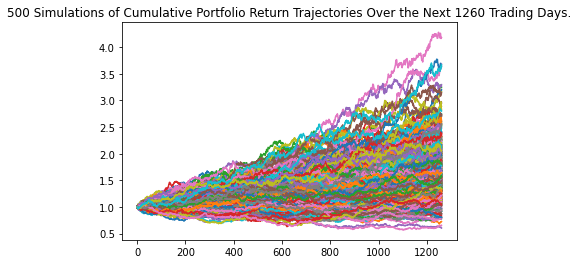

In [44]:
# Plot simulation outcomes
plot2 = shrt_retirement_MC.plot_simulation()

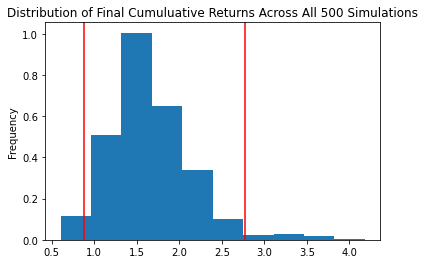

In [45]:
# Plot probability distribution and confidence intervals
dist_plot2 = shrt_retirement_MC.plot_distribution()

In [38]:
# Fetch summary statistics from the Monte Carlo simulation results
shrt_stats = shrt_retirement_MC.summarize_cumulative_return()

# Print summary statistics
print(shrt_stats)

count           500.000000
mean              1.654874
std               0.485037
min               0.603817
25%               1.347392
50%               1.572346
75%               1.899963
max               4.181052
95% CI Lower      0.874142
95% CI Upper      2.776262
Name: 1260, dtype: float64


In [41]:
# Set initial investment
shrt_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_shrt = round(stats[8]*shrt_initial_investment,2)
ci_upper_shrt = round(stats[9]*shrt_initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${shrt_initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_shrt} and ${ci_upper_shrt}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $241863.21 and $3787086.13


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_retirement_MC = MCSimulation(
    portfolio_data = df_365,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_yr_retirement_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005073,1.006664,0.984998,0.997246,1.015939,1.000670,1.002333,1.014318,1.001395,1.006273,...,1.002994,1.014234,1.000248,1.002727,0.988725,0.998344,1.011139,0.999731,1.000112,0.994128
2,1.011605,1.004467,0.989134,1.002089,1.013468,0.989677,1.013273,1.022634,1.004504,1.003603,...,1.009936,1.004907,1.001035,0.990771,0.975680,0.997862,1.006526,1.005251,0.998606,0.983393
3,1.010888,1.014740,0.994975,0.995717,1.026310,0.999035,1.019876,1.015571,0.983658,0.995650,...,0.999817,1.003755,0.995706,0.999419,0.974139,0.990399,1.012039,1.015510,0.982864,0.976537
4,1.001246,1.009614,1.003915,0.991632,1.027532,0.996058,1.028298,1.012623,0.974665,1.000286,...,1.014355,1.004265,0.995485,0.999128,0.965182,0.973067,1.011510,1.010818,0.986119,0.984325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.896370,2.919967,4.064787,2.005830,2.340185,3.593909,5.211555,3.686653,2.878825,2.176525,...,1.347564,2.107247,1.639511,4.370146,3.303567,1.829749,3.146741,2.803644,2.065201,1.566150
2517,2.886081,2.914079,4.108892,2.003660,2.341908,3.572202,5.220608,3.707422,2.898160,2.181305,...,1.351601,2.113242,1.618280,4.341888,3.315790,1.842014,3.146986,2.819804,2.077396,1.572992
2518,2.884359,2.941185,4.130014,1.999705,2.358221,3.606216,5.202502,3.663820,2.888340,2.153890,...,1.352238,2.091252,1.617928,4.314077,3.331105,1.822534,3.169262,2.840794,2.064075,1.577362
2519,2.870901,2.949586,4.060791,1.979006,2.333842,3.628801,5.224184,3.677374,2.845252,2.111054,...,1.339041,2.073556,1.636065,4.275659,3.326452,1.835027,3.179223,2.826585,2.084908,1.581617


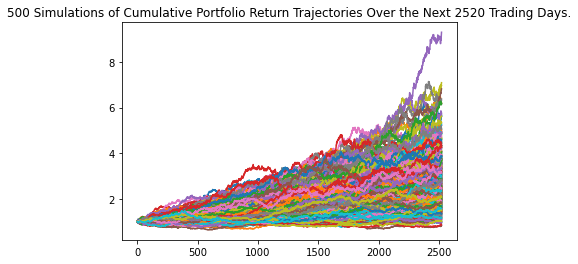

In [46]:
# Plot simulation outcomes
plot3 = ten_yr_retirement_MC.plot_simulation()

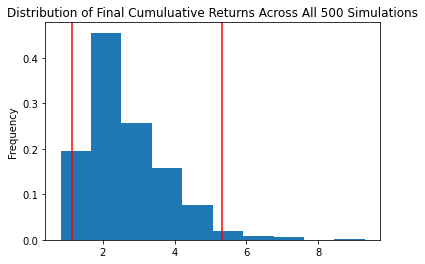

In [47]:
# Plot probability distribution and confidence intervals
dist_plot3 = ten_yr_retirement_MC.plot_distribution()

In [49]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_yr_stats = ten_yr_retirement_MC.summarize_cumulative_return()

# Print summary statistics
print(ten_yr_stats)

count           500.000000
mean              2.661165
std               1.126498
min               0.820985
25%               1.876151
50%               2.368302
75%               3.298987
max               9.302699
95% CI Lower      1.128595
95% CI Upper      5.317819
Name: 2520, dtype: float64


In [50]:
# Set initial investment
ten_yr_initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten_yr = round(stats[8]*ten_yr_initial_investment,2)
ci_upper_ten_yr = round(stats[9]*ten_yr_initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_yr} and ${ci_upper_ten_yr}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $241863.21 and $3787086.13
